In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import date

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


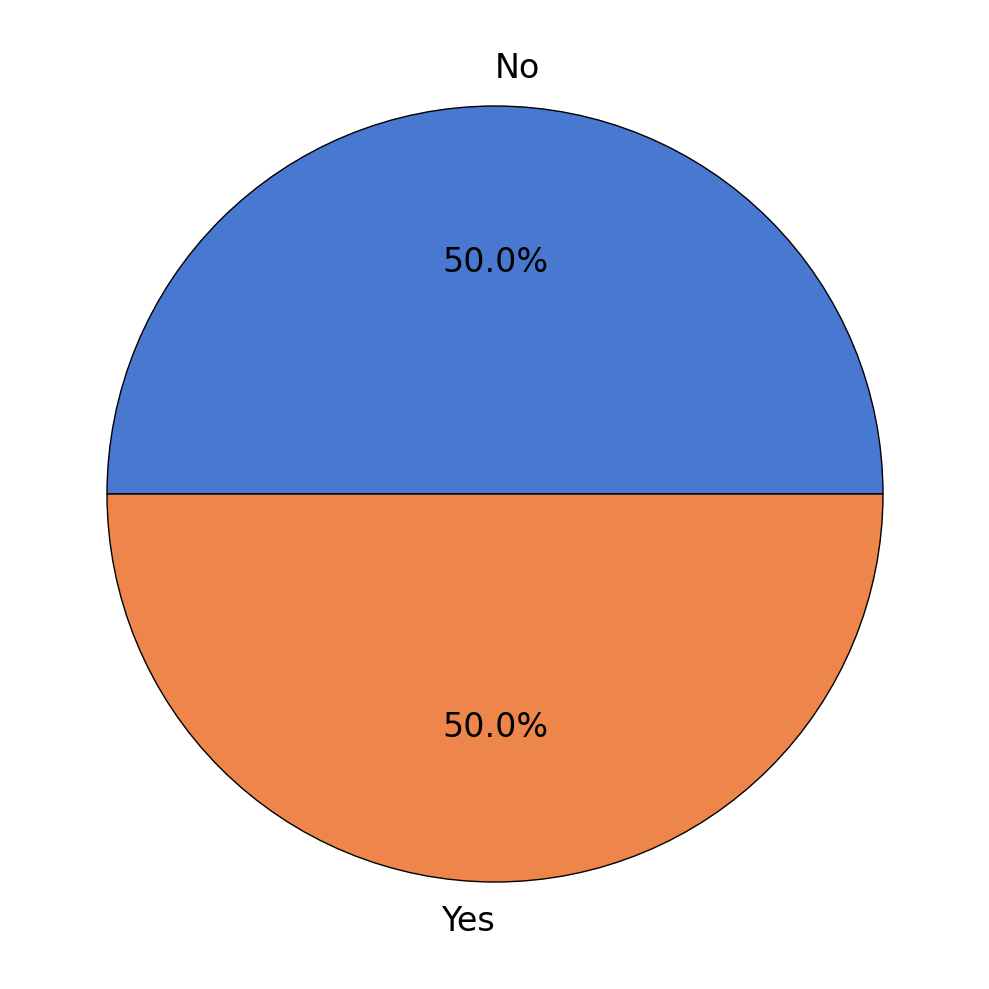

In [5]:
pieriskflag = df.groupby('Clicked on Ad').count()['Unnamed: 0'].plot(kind='pie', colors=sns.color_palette('muted'),
                                               wedgeprops={'edgecolor':'k'}, autopct='%1.1f%%',figsize=(10,10),textprops={'fontsize':24})
plt.ylabel('')
plt.tight_layout()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [4]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')
print(df_num.columns)
print(df_cat.columns)

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object')
Index(['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')


Insight:
1. pola dari customer saat menggunakan internet dan apakah durasi customer saat berada dalam sebuah website akan berpengaruh pada marketing perusahaan tersebut, hal ini tentunya akan menghitung pola perilaku customer yang mengklik iklan yang disajikan.
2. mengetahui bagaimana interval umur yang dapat menjadi target marketing, yaitu rentang umur berapa yang akan mengunjungi iklan tersebut

# Tugas 1
### Customer Type and Behaviour Analysis on Advertisement


1. analisis univariate pada kolom umur, penggunaan internet harian, dan daily time spent on site dengan membedakan user yang mengklik iklan dan yang tidak

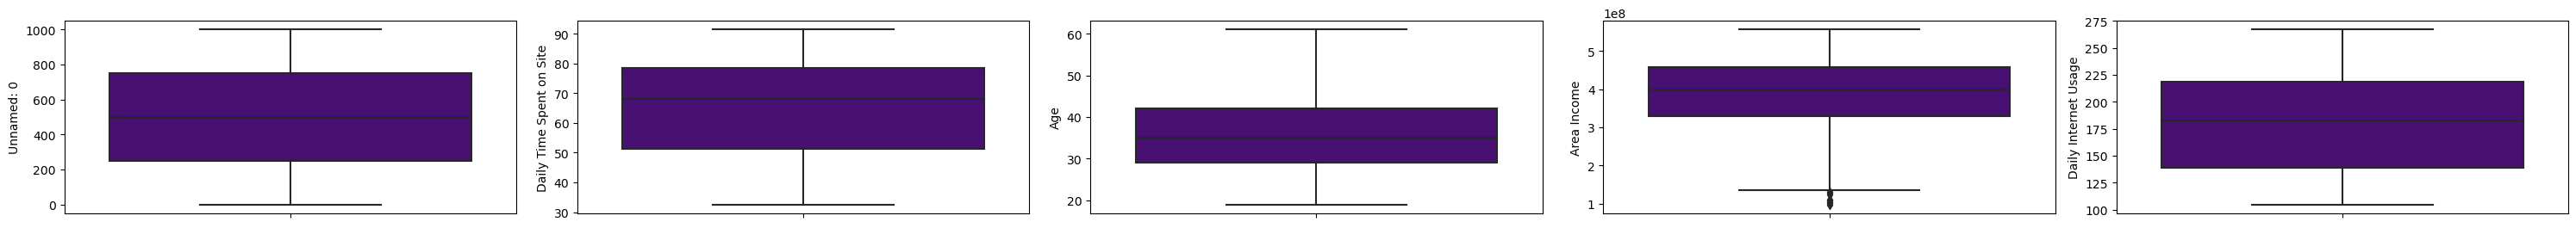

In [5]:
features = df_num.columns
fig = plt.subplots(figsize=(30,10))
for i in range(0, len(features)):
    plt.subplot(4, int(len(features)/1), i+1)
    sns.boxplot(y=df_num[features[i]],color='indigo', orient='v')
plt.tight_layout()
plt.show()

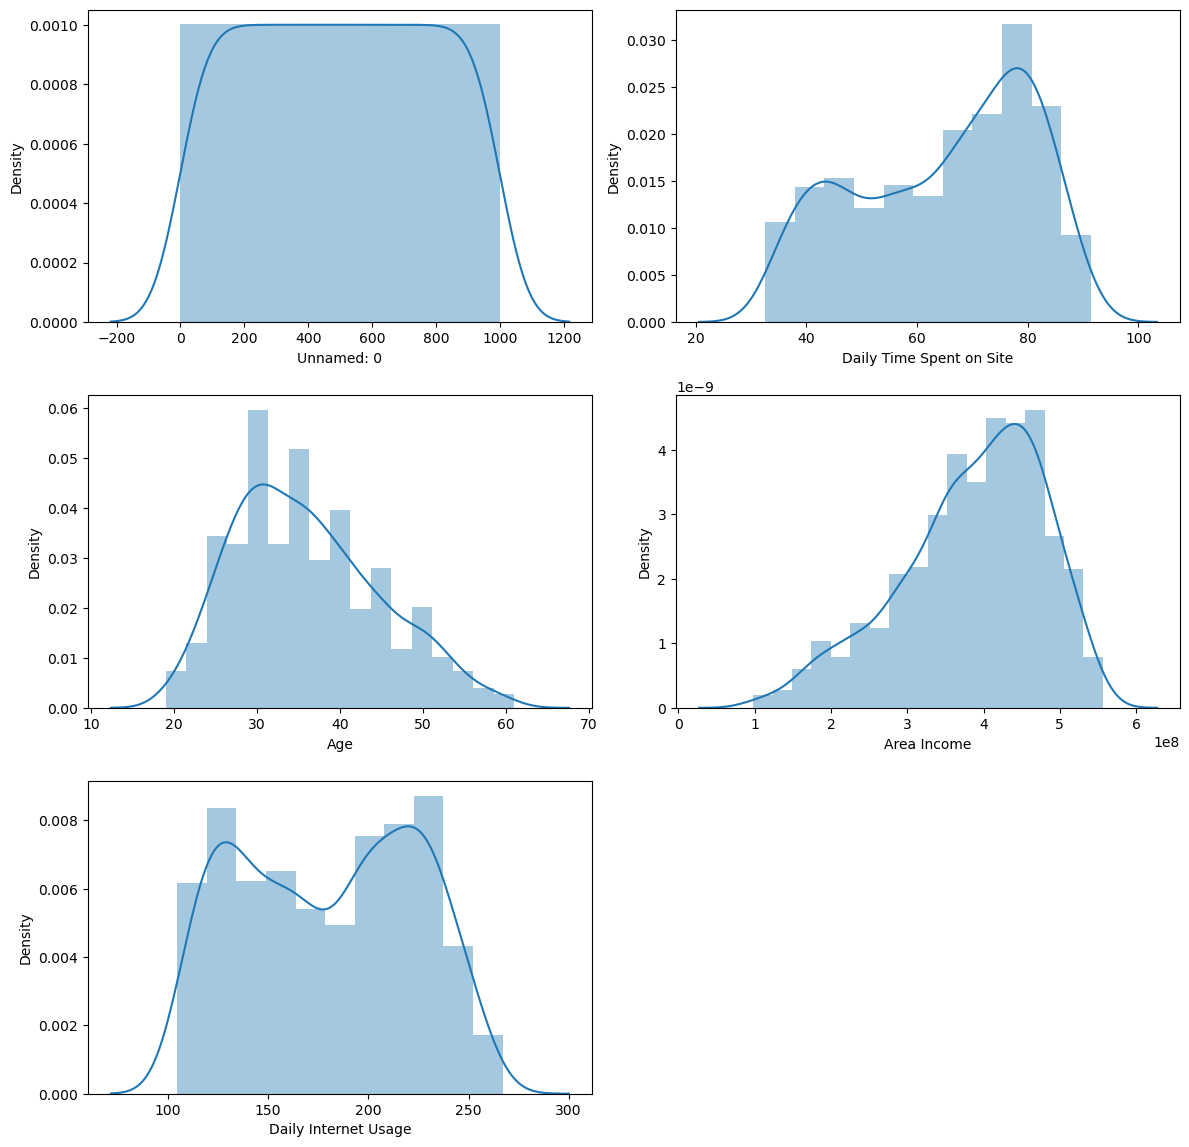

In [6]:
num_var = df_num.columns
fig = plt.subplots(figsize=(12,15))
for i in range(0, len(num_var)):
    plt.subplot(4, int(len(num_var)/2), i+1)
    sns.distplot(df[num_var[i]])
plt.tight_layout()
plt.show()

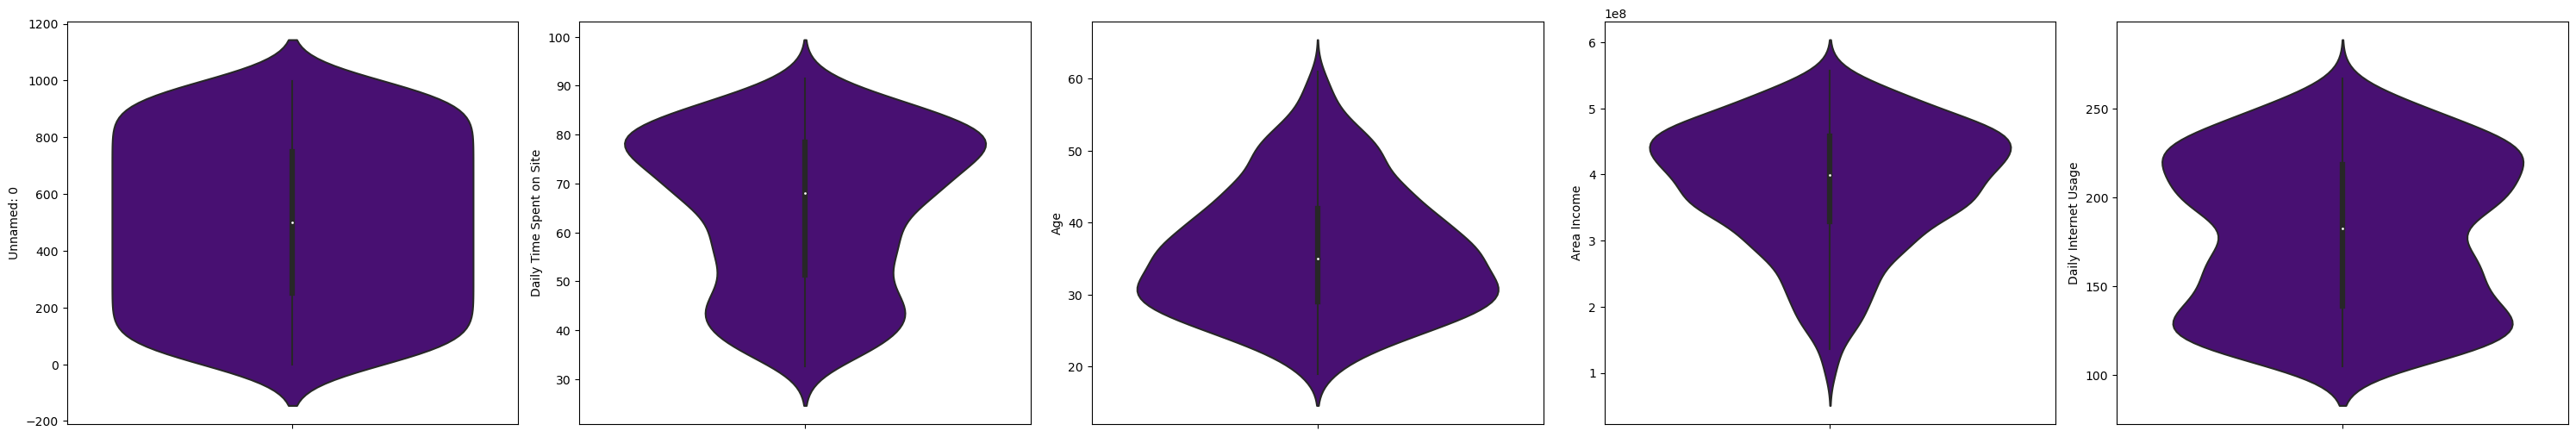

In [7]:
features = df_num.columns
fig = plt.subplots(figsize=(30,10))
for i in range(0, len(features)):
    plt.subplot(2, int(len(features)/1), i+1)
    sns.violinplot(y=df_num[features[i]],color='indigo', orient='v')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

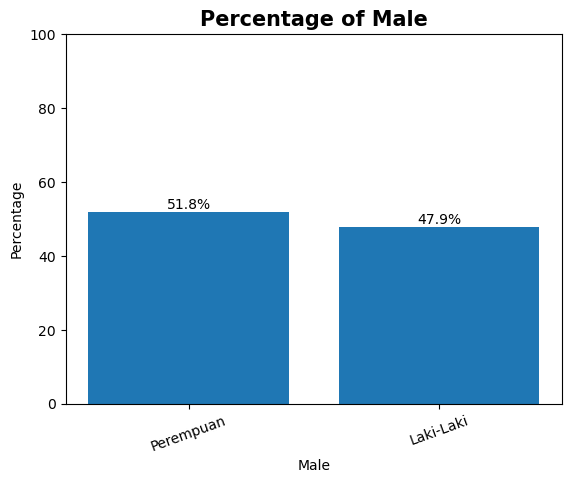

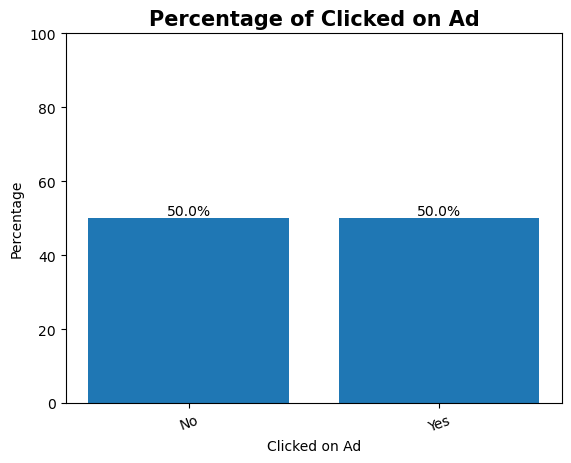

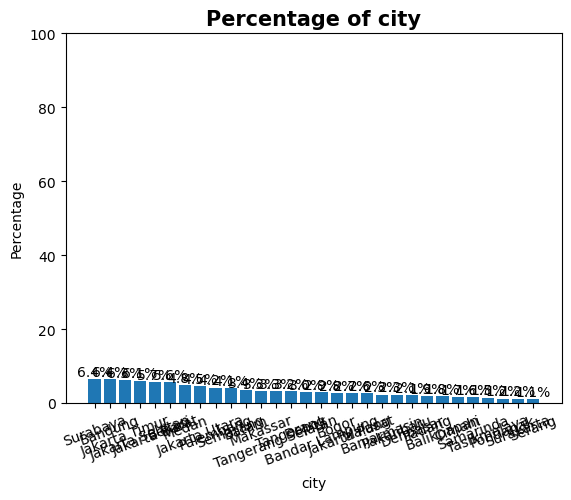

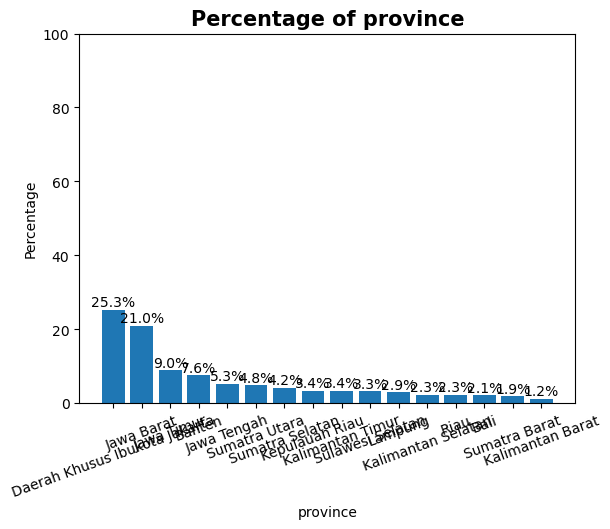

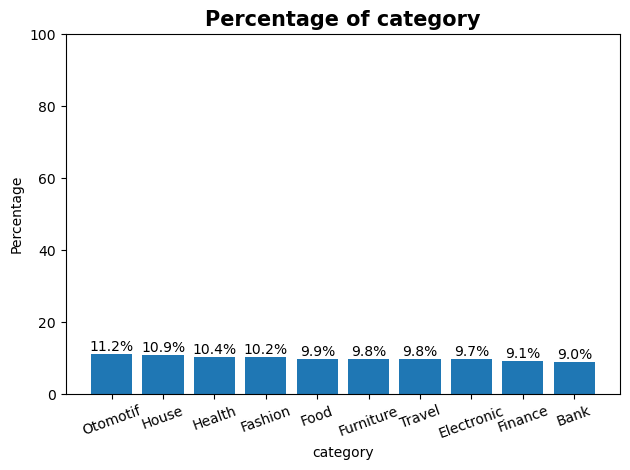

In [6]:
cat_var=df[['Male', 'Clicked on Ad', 'city', 'province', 'category']]

#Calculate the percentage of each categorical variable
for column in cat_var:
  counts = df[column].value_counts()
  percent = round((counts / len(df)) * 100,2)

#Create the bar plot
  fig, ax = plt.subplots()
  ax.bar(counts.index, percent)
  ax.set_xlabel(column)
  ax.set_ylabel('Percentage')
  ax.set_ylim(0,100)
  ax.set_title(f'Percentage of {column}', fontweight='bold', fontsize=15)

#Add percentage
  for i in range(len(percent)):
    value = round(percent[i],2)
    label = f'{value}%'
    plt.text(i, percent[i], label, ha ='center', va='bottom')
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show

2. Buatlah bivariate analysis pada variabel yang telah diteliti pada univariate analysis

In [7]:
#group age
age_list=[]
for i in df['Age']:
    if i >= 0 and i <= 4:
        group = 'Balita'
    elif i >= 5 and i <= 12:
        group = 'Children'
    elif i >= 13 and i <= 17:
        group = 'Teenager'
    elif i >= 18 and i <= 24:
        group = 'Young_Adult'
    elif i >= 25 and i <= 39:
        group = 'Adult'
    elif i >= 40 and i <= 59:
        group = 'Middle Aged'
    else:
        group = 'Senior Citizen'
    age_list.append(group)
df['Age_Group'] = age_list

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


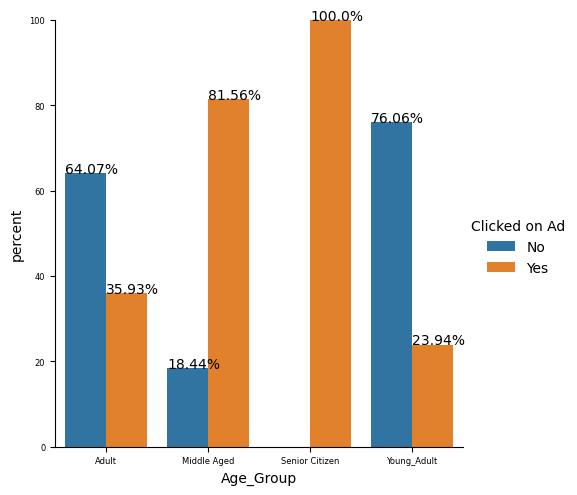

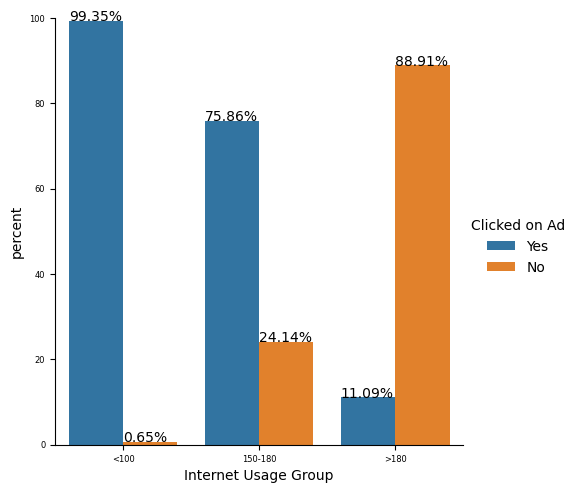

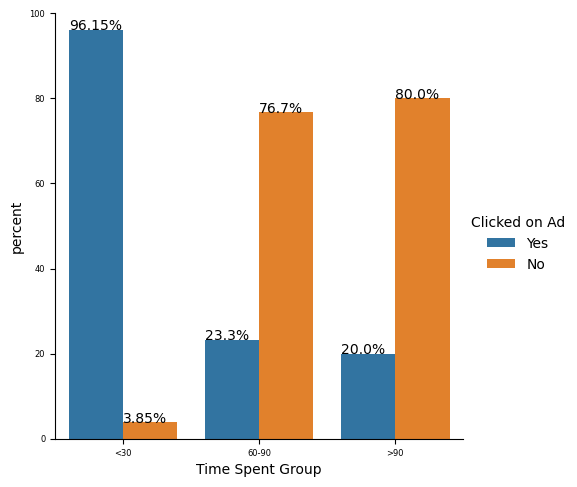

In [8]:
#Categoricals on Target
x, y = 'Age_Group', 'Clicked on Ad'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);

    
df['Daily Internet Usage'] = pd.to_numeric(df['Daily Internet Usage'], errors='coerce')
df['Internet Usage Group'] = pd.cut(df['Daily Internet Usage'], bins=[100.000000, 150.000000, 180.000000, 300.000000], labels=['<100', '150-180', '>180'])


x, y = 'Internet Usage Group', 'Clicked on Ad'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);
    
    
df['Time Spent Group'] = pd.cut(df['Daily Time Spent on Site'], bins=[30, 60, 90, float('inf')], labels=['<30','60-90', '>90'])   
x, y = 'Time Spent Group', 'Clicked on Ad'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.tick_params(axis = 'both', which='major',labelsize = 6)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt);


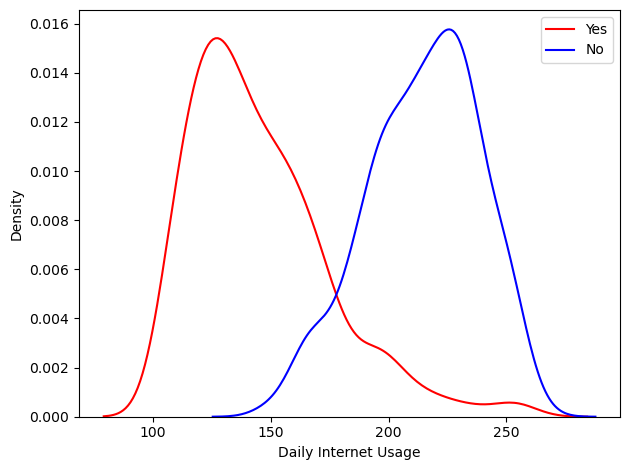

In [7]:
sns.kdeplot(df[df['Clicked on Ad']=='Yes']['Daily Internet Usage'],color='red',label='Yes')
sns.kdeplot(df[df['Clicked on Ad']=='No']['Daily Internet Usage'],color='blue',label='No')
plt.legend()
plt.tight_layout()

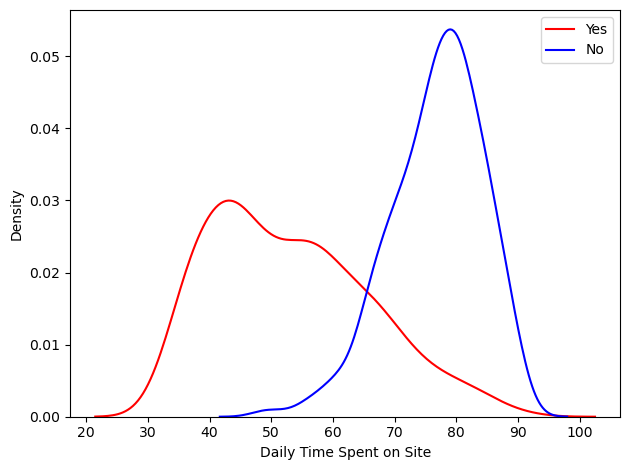

In [5]:
sns.kdeplot(df[df['Clicked on Ad']=='Yes']['Daily Time Spent on Site'],color='red',label='Yes')
sns.kdeplot(df[df['Clicked on Ad']=='No']['Daily Time Spent on Site'],color='blue',label='No')
plt.legend()
plt.tight_layout()

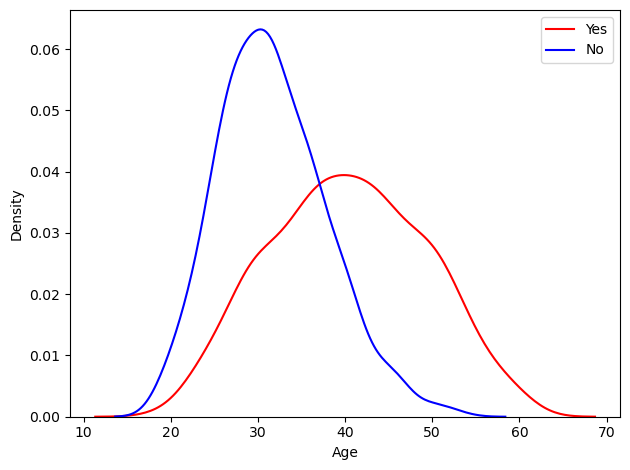

In [6]:
sns.kdeplot(df[df['Clicked on Ad']=='Yes']['Age'],color='red',label='Yes')
sns.kdeplot(df[df['Clicked on Ad']=='No']['Age'],color='blue',label='No')
plt.legend()
plt.tight_layout()

3. Buatlah korelasi antar kolom dan lakukan multivariate analysis

<Axes: >

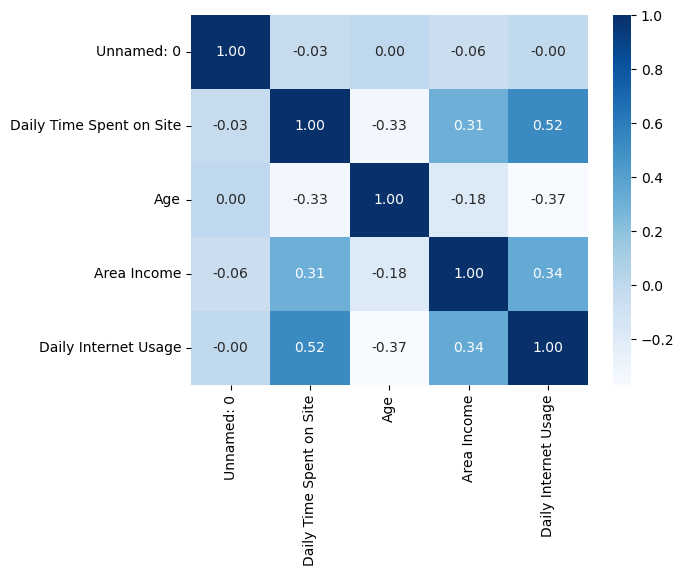

In [9]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

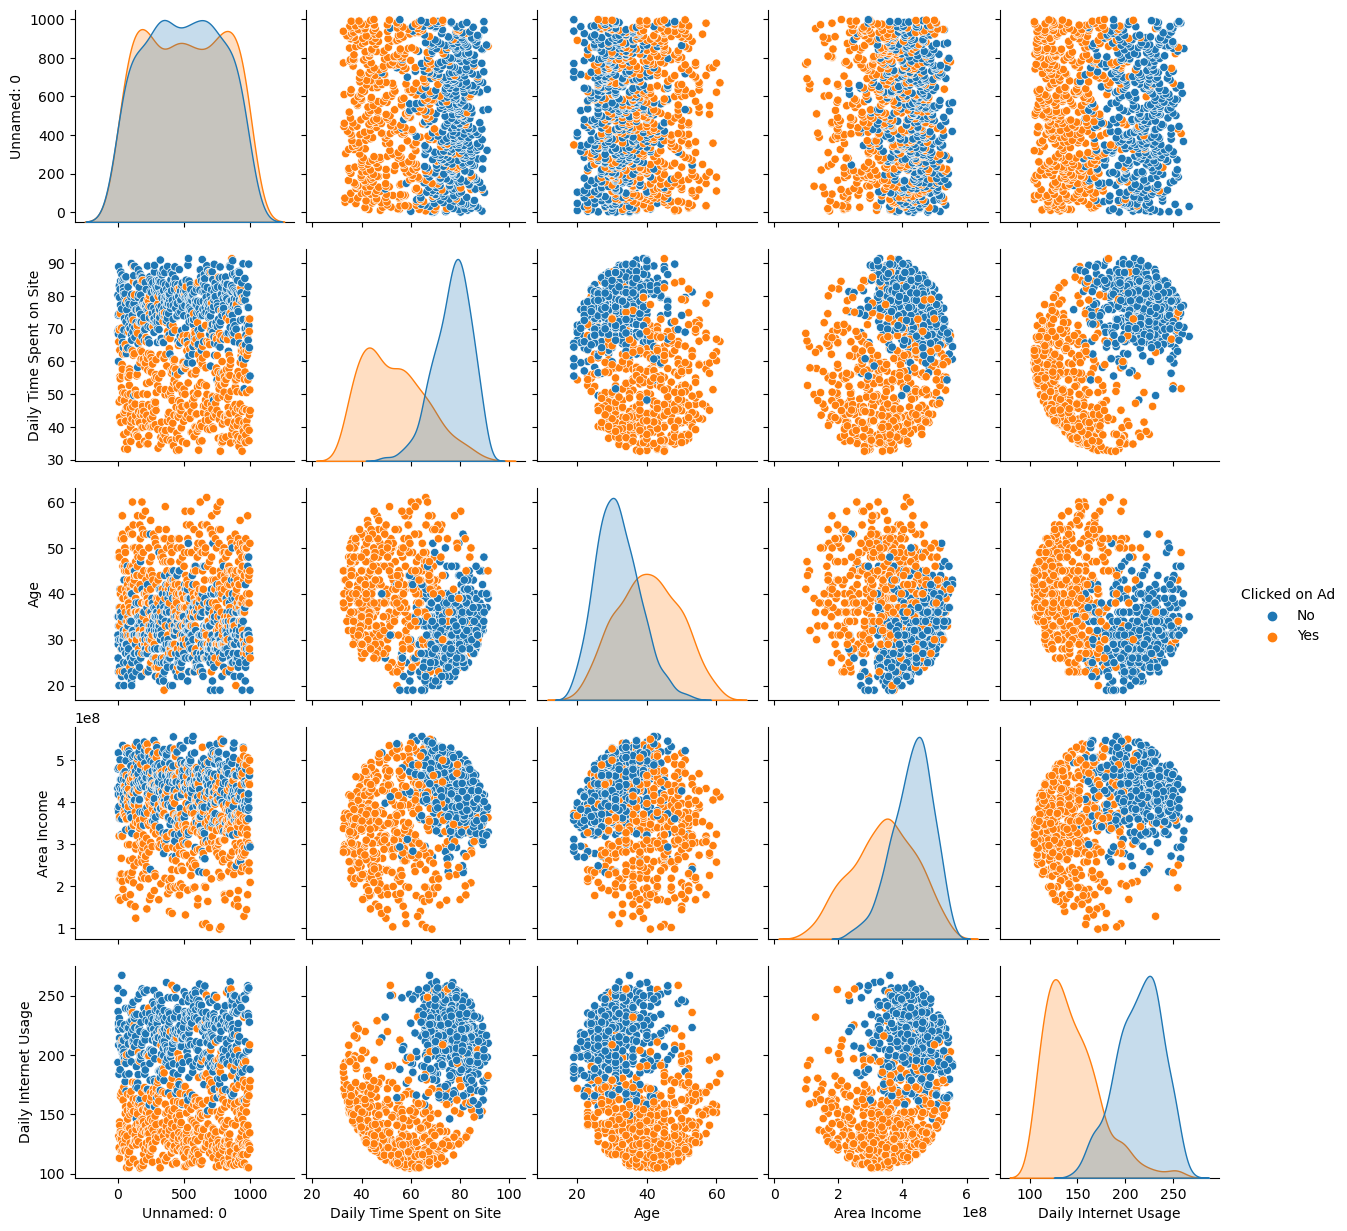

In [12]:
sns.pairplot(df, diag_kind='kde', hue='Clicked on Ad')

# Tugas 2
### Data Cleaning & Preprocessing

1. Missing Value

In [10]:
df_copy = df.copy()

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                1000 non-null   int64   
 1   Daily Time Spent on Site  987 non-null    float64 
 2   Age                       1000 non-null   int64   
 3   Area Income               987 non-null    float64 
 4   Daily Internet Usage      989 non-null    float64 
 5   Male                      997 non-null    object  
 6   Timestamp                 1000 non-null   object  
 7   Clicked on Ad             1000 non-null   object  
 8   city                      1000 non-null   object  
 9   province                  1000 non-null   object  
 10  category                  1000 non-null   object  
 11  Age_Group                 1000 non-null   object  
 12  Internet Usage Group      989 non-null    category
 13  Time Spent Group          987 non-null    categor

In [12]:
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])

In [13]:
df_copy['year'] = df_copy['Timestamp'].dt.year
df_copy['month'] = df_copy['Timestamp'].dt.month
df_copy['day'] = df_copy['Timestamp'].dt.day
df_copy['hour'] = df_copy['Timestamp'].dt.hour

In [14]:
df_copy.head(2)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Age_Group,Internet Usage Group,Time Spent Group,year,month,day,hour
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,Adult,>180,60-90,2016,3,27,0
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,Adult,>180,60-90,2016,4,4,1


In [15]:
drop_fitur = ['province', 'Unnamed: 0', 'Timestamp', 'Age_Group', 'Internet Usage Group', 'Time Spent Group', 'city']
df_copy = df_copy.drop(drop_fitur,axis=1)
df_copy.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,category,year,month,day,hour
0,68.95,35,432837300.0,256.09,Perempuan,No,Furniture,2016,3,27,0
1,80.23,31,479092950.0,193.77,Laki-Laki,No,Food,2016,4,4,1
2,69.47,26,418501580.0,236.50,Perempuan,No,Electronic,2016,3,13,20
3,74.15,29,383643260.0,245.89,Laki-Laki,No,House,2016,1,10,2
4,68.37,35,517229930.0,225.58,Perempuan,No,Finance,2016,6,3,3


In [16]:
df_copy.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Clicked on Ad                0
category                     0
year                         0
month                        0
day                          0
hour                         0
dtype: int64

In [17]:
df_copy['Daily Time Spent on Site'] = df_copy['Daily Time Spent on Site'].fillna(df_copy['Daily Time Spent on Site'].mean())
df_copy['Area Income'] = df_copy['Area Income'].fillna(df_copy['Area Income'].median())
df_copy['Daily Internet Usage'] = df_copy['Daily Internet Usage'].fillna(df_copy['Daily Internet Usage'].mean())
df_copy['Male'] = df_copy['Male'].fillna(df_copy['Male'].mode()[0])

<Axes: >

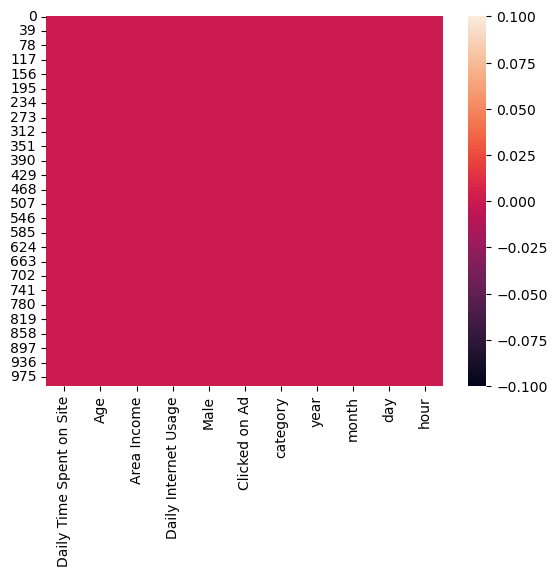

In [18]:
sns.heatmap(df_copy.isnull())

In [73]:
df_copy.duplicated().sum()

0

In [21]:


# Menentukan batas outlier menggunakan metode IQR
Q1 = df_copy['Area Income'].quantile(0.30)
Q3 = df_copy['Area Income'].quantile(0.70)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
data_filtered = df_copy[(df_copy['Area Income'] > lower_bound) & (df_copy['Area Income'] < upper_bound)]

# Menampilkan hasil
print("Jumlah data sebelum penghapusan outlier:", len(df_copy))
print("Jumlah data setelah penghapusan outlier:", len(data_filtered))


Jumlah data sebelum penghapusan outlier: 1000
Jumlah data setelah penghapusan outlier: 946


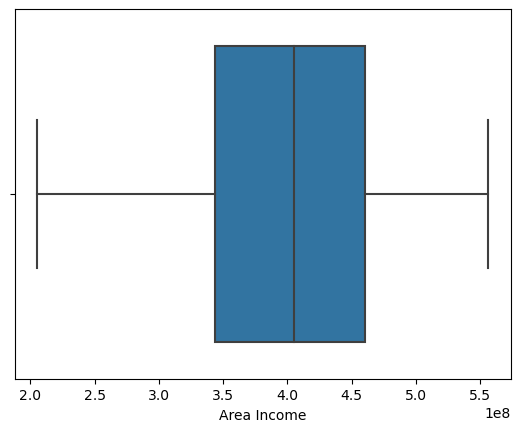

In [22]:
sns.boxplot(x=data_filtered['Area Income'])
plt.show()

In [23]:
# label encoding Clicked on Ad
Mappingclicked = {
    'No' : 1,
    'Yes' : 0
}

df_copy['Clicked on Ad'] = df_copy['Clicked on Ad'].map(Mappingclicked)

In [24]:
for i in ['Male','category']:
  onehots = pd.get_dummies(df_copy[i],prefix='enc')
  df_copy=df_copy.join(onehots)

In [25]:
df_copy = df_copy.drop(['Male','category'], axis=1)

In [26]:
df_copy.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,year,month,day,hour,enc_Laki-Laki,enc_Perempuan,enc_Bank,enc_Electronic,enc_Fashion,enc_Finance,enc_Food,enc_Furniture,enc_Health,enc_House,enc_Otomotif,enc_Travel
0,68.95,35,432837300.0,256.09,1,2016,3,27,0,0,1,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,2016,4,4,1,1,0,0,0,0,0,1,0,0,0,0,0


In [27]:
df_copy.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Clicked on Ad               0
year                        0
month                       0
day                         0
hour                        0
enc_Laki-Laki               0
enc_Perempuan               0
enc_Bank                    0
enc_Electronic              0
enc_Fashion                 0
enc_Finance                 0
enc_Food                    0
enc_Furniture               0
enc_Health                  0
enc_House                   0
enc_Otomotif                0
enc_Travel                  0
dtype: int64

In [29]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

X = df_copy.drop('Clicked on Ad', axis=1)  # Memisahkan fitur dari target
y = df_copy['Clicked on Ad']  # Kolom target

# Feature Selection dengan Univariate Selection (chi-square)
# Memilih 5 fitur terbaik
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)].tolist()
print("Fitur terbaik (Univariate Selection):", selected_features)

# Feature Selection dengan Recursive Feature Elimination (RFE) dengan Random Forest
# Memilih 3 fitur terbaik
estimator = RandomForestClassifier(n_estimators=100)
selector = RFE(estimator, n_features_to_select=3, step=1)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.support_].tolist()
print("Fitur terbaik (RFE dengan Random Forest):", selected_features)


Fitur terbaik (Univariate Selection): ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'hour']
Fitur terbaik (RFE dengan Random Forest): ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']


In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1, stratify = y)

In [32]:
X_test_copy = X_test.copy()

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
data_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

X_train[data_scale] = scaler.fit_transform(X_train[data_scale])
X_test[data_scale] = scaler.transform(X_test[data_scale])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = (model.predict_proba(X_test)[:,1]).astype('float')
    y_pred_proba_train = (model.predict_proba(X_train)[:,1]).astype('float')
    

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train))

    score_roc_auc = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True) 
    print('roc_auc_score (crossval train): '+ str(score_roc_auc['train_score'].mean()))
    print('roc_auc_score (crossval test): '+ str(score_roc_auc['test_score'].mean()))

    score_acc = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
    print('accuracy_score (crossval train): '+ str(score_acc['train_score'].mean()))
    print('accuracy_score (crossval test): '+ str(score_acc['test_score'].mean()))

    score_prec = cross_validate(model, X, y, cv=5, scoring='precision', return_train_score=True)
    print('precision_score (crossval train): '+ str(score_prec['train_score'].mean()))
    print('presicion_score (crossval test): '+ str(score_prec['test_score'].mean()))

    score_rec = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall_score (crossval train): '+ str(score_rec['train_score'].mean()))
    print('recall_score (crossval test): '+ str(score_rec['test_score'].mean()))

    score_f1 = cross_validate(model, X, y, cv=5, scoring='f1', return_train_score=True)
    print('f1_score (crossval train): '+ str(score_f1['train_score'].mean()))
    print('f1_score (crossval test): '+ str(score_f1['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

Mertiks evaluasi yang digunakan adalah Recall atau juga disebut sebagai True Positive Rate (TPR). Recall mengukur seberapa baik model dapat mengidentifikasi secara akurat pelanggan yang tertarik dengan iklan. Dalam hal ini, Recall akan memberi tahu Anda seberapa besar proporsi pelanggan yang sebenarnya tertarik dengan iklan yang berhasil ditangkap oleh model.

Dengan menggunakan Recall, dapat mengevaluasi seberapa baik model dapat menemukan pelanggan yang berpotensi tertarik dengan iklan. Semakin tinggi Recall, semakin banyak pelanggan yang tertarik dengan iklan yang berhasil terdeteksi oleh model. Dengan mengetahui tingkat Recall yang tinggi, dapat memperoleh pemahaman yang lebih baik tentang seberapa besar ketercapaian iklan Anda dalam menarik pelanggan yang tepat

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train,y_train)
eval_classification(dt)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 0.97
Precision (Train Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.95
F1-Score (Test Set): 1.00
roc_auc (test-proba): 0.95
roc_auc (train-proba): 1.00
roc_auc_score (crossval train): 1.0
roc_auc_score (crossval test): 0.932
accuracy_score (crossval train): 1.0
accuracy_score (crossval test): 0.932
precision_score (crossval train): 1.0
presicion_score (crossval test): 0.9416410275694789
recall_score (crossval train): 1.0
recall_score (crossval test): 0.924
f1_score (crossval train): 1.0
f1_score (crossval test): 0.9313257259527669


In [38]:
lr = LogisticRegression(random_state=5)
lr.fit(X_train,y_train)
eval_classification(lr)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.99
Precision (Train Set): 0.96
Recall (Test Set): 0.96
Recall (Train Set): 0.98
F1-Score (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.99
roc_auc_score (crossval train): 0.7692925
roc_auc_score (crossval test): 0.7693
accuracy_score (crossval train): 0.5
accuracy_score (crossval test): 0.5
precision_score (crossval train): 0.5
presicion_score (crossval test): 0.5
recall_score (crossval train): 1.0
recall_score (crossval test): 1.0
f1_score (crossval train): 0.6666666666666666
f1_score (crossval test): 0.6666666666666666


score recall pada Logistik regression sudah lumayan bagus, tapi disini saya akan melakukan hyparameter tuning untuk mendapatkan score yang lebih baik lagi

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=5)
rf.fit(X_train,y_train)
eval_classification(rf)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.94
Recall (Train Set): 1.00
F1-Score (Test Set): 0.97
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc_score (crossval train): 1.0
roc_auc_score (crossval test): 0.9906799999999999
accuracy_score (crossval train): 1.0
accuracy_score (crossval test): 0.9640000000000001
precision_score (crossval train): 1.0
presicion_score (crossval test): 0.9626517904964507
recall_score (crossval train): 1.0
recall_score (crossval test): 0.966
f1_score (crossval train): 1.0
f1_score (crossval test): 0.9641234019859894


In [52]:
from sklearn.model_selection import RandomizedSearchCV

hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}


lr = LogisticRegression(random_state=5,)
lr = RandomizedSearchCV(lr, hyperparameters, scoring='recall', random_state=5, cv=5)
lr.fit(X_train,y_train)
eval_classification(lr)

Accuracy (Test Set): 0.97
Accuracy (Train Set): 0.97
Precision (Test Set): 0.99
Precision (Train Set): 0.95
Recall (Test Set): 0.96
Recall (Train Set): 0.99
F1-Score (Test Set): 0.97
F1-Score (Test Set): 0.97
roc_auc (test-proba): 1.00
roc_auc (train-proba): 0.99
roc_auc_score (crossval train): 0.7692925
roc_auc_score (crossval test): 0.7693
accuracy_score (crossval train): 0.5
accuracy_score (crossval test): 0.5
precision_score (crossval train): 0.5
presicion_score (crossval test): 0.5
recall_score (crossval train): 1.0
recall_score (crossval test): 1.0
f1_score (crossval train): 0.6666666666666666
f1_score (crossval test): 0.6666666666666666


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Definisikan hyperparameter yang akan diuji
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

# Inisialisasi model Logistic Regression
lr = LogisticRegression(random_state=5)

# Buat objek RandomizedSearchCV
random_search = RandomizedSearchCV(lr, hyperparameters, scoring='recall', random_state=5, cv=5)

# Lakukan Random Search untuk mencari model terbaik
random_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_lr = random_search.best_estimator_

# Evaluasi model terbaik pada data uji
y_pred = best_lr.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.96


dari hasil hyparameter tuning terdapat kenaikan score recall dari sebelum dilakukan hyparameter tuning.

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 40)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 200, 40)]
min_samples_split = [int(x) for x in np.linspace(2, 50, 20)] 
min_samples_leaf = [int(x) for x in np.linspace(2, 50, 20)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)


rf = RandomForestClassifier(random_state=5,)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='f1', random_state=5, cv=5)
rs.fit(X_train,y_train)
eval_classification(rs) 

Accuracy (Test Set): 0.96
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Precision (Train Set): 0.98
Recall (Test Set): 0.93
Recall (Train Set): 0.99
F1-Score (Test Set): 0.96
F1-Score (Test Set): 0.99
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc_score (crossval train): 0.9986962500000001
roc_auc_score (crossval test): 0.9902200000000001
accuracy_score (crossval train): 0.98675
accuracy_score (crossval test): 0.96
precision_score (crossval train): 0.9802667508705813
presicion_score (crossval test): 0.9590663920761008
recall_score (crossval train): 0.9935
recall_score (crossval test): 0.962
f1_score (crossval train): 0.986830293105559
f1_score (crossval test): 0.9602178787901213


disini saya juga mencoba melakukan hyparaneter tuning pada random forest dimana yang sebelumnya mengalamin overfitting, setelah dilakukan tuning score recall nya membaik

## Feature Importance

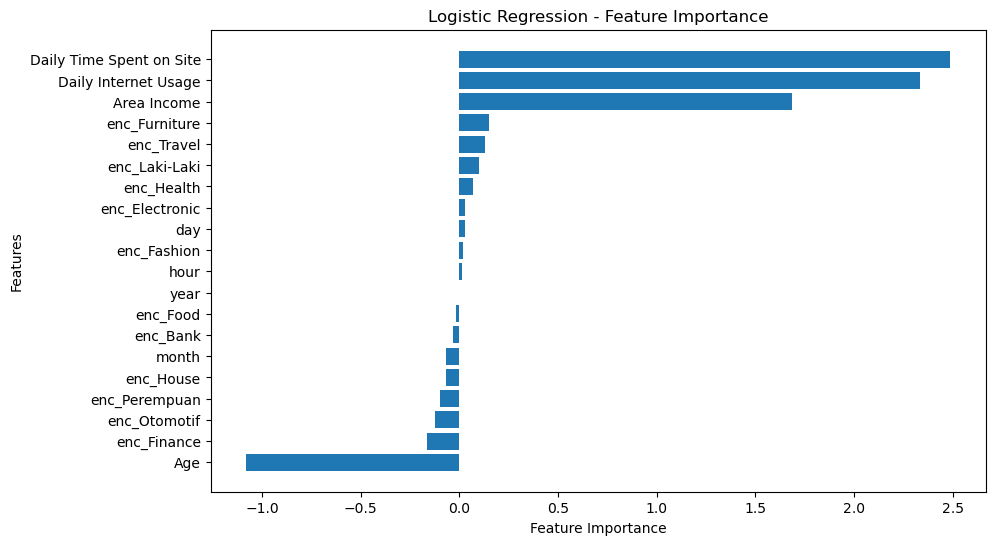

In [75]:
# Membuat model Regresi Logistik
lr = LogisticRegression(random_state=5)
lr.fit(X_train, y_train)

# Menghitung koefisien fitur
feature_importance = lr.coef_[0]

# Menampilkan feature importance dalam bentuk grafik
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), np.array(X_train.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Logistic Regression - Feature Importance')
plt.show()


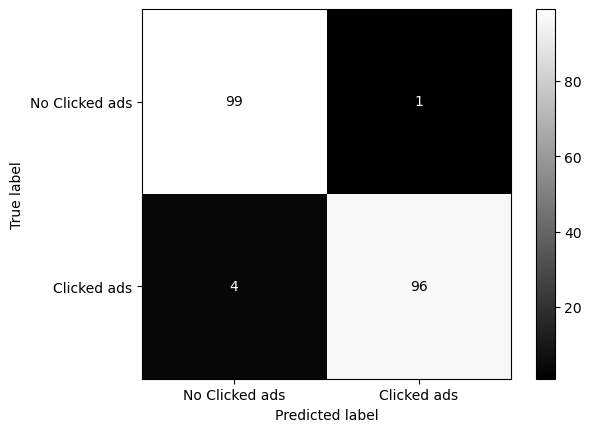

Confusion Matrix:
[[99  1]
 [ 4 96]]


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Prediksi pada data uji menggunakan model terbaik
y_pred = best_lr.predict(X_test)

# Membuat confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Clicked ads','Clicked ads'])

confusion_matrix_display.plot(cmap='gray',values_format='')
plt.show()

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)


## Business Impact

In [69]:
y_test.value_counts()

0    100
1    100
Name: Clicked on Ad, dtype: int64

Sebelum menerapkan machine learning, terdapat sekitar 100 dari total 200 pelanggan yang tidak mengklik iklan, namun diprediksi sebagai pelanggan yang mengklik iklan. Kondisi ini menyebabkan perusahaan mengalami kerugian sebesar 50% karena pelanggan yang sebenarnya tidak berminat pada iklan tetapi tetap diperlakukan sebagai pelanggan potensial.

Namun, setelah menerapkan machine learning, perusahaan berhasil mengurangi kerugian secara signifikan menjadi hanya 0.5%. Hal ini berarti model machine learning mampu memprediksi dengan akurasi yang tinggi pelanggan yang sebenarnya tidak berminat pada iklan, sehingga perusahaan dapat mengoptimalkan sumber daya dan strategi pemasaran dengan lebih efektif. Dengan demikian, penggunaan machine learning membawa manfaat besar bagi perusahaan dalam mengurangi kerugian yang terjadi akibat targeting yang tidak tepat sebelumnya

## Asumsi:
- cost ads = Rp. 10000
- n users = 200
- cust yang convert = Rp. 40000 (convertnya seperti melakukan pembelian, mengisi formulir, mendaftar langganan, atau melakukan interaksi lainnya)

## Tanpa Machine Learning
- Cost = cost ads * n user
- Cost = Rp. 10000 * 200
- Cost = Rp. 2.000.000

Hanya 50 cust yang convert, jadi 50 * 40000 = Rp. 2.000.000

- Revenue = Rp. 2.000.000
- Profit = Rp. 2.000.000 - Rp. 1.000.000 = Rp. 1.000.000

Presentase

- Persentase kerugian = (profit / cost) * 100
- Persentase kerugian = (Rp. 1.000.000 / Rp. 2.000.000) * 100 = 50%

Tanpa menggunakan machine learning perusahaan mengalami kerugian sebesar 50%

## Dengan Machine Learning 
- Cost = cost ads * n users
- Cost = Rp. 10000 * 200
- Cost = Rp. 2,000,000

Cvr yang didapat naik menjadi 96% (192 user)

- Revenue = Rp. 40000 * 192 = Rp. 7.680.000
- Profit = Revenue - Cost
- Profit = Rp. 7.680.000 - Rp. 2.000.000
- Profit = Rp. 5.680.000

Dengan menggunakan machine learning akan menaikan revenue yang sangat signifikan

## Rekomendasi Business berdasarkan feature importance dan EDA

- Berdasarkan EDA dan feature importance Tingkat Penggunaan Internet Harian <100 memiliki persentase klik iklan yang cukup tinggi. Hal ini dapat menjadi pertimbangan untuk menargetkan pengguna dengan tingkat penggunaan internet harian yang rendah ini dengan iklan yang menarik dan relevan. Misalnya, melalui iklan yang menawarkan konten pendek dan menarik atau penawaran spesial yang terbatas.
- Waktu yang Dihabiskan di Situs 60-90 Menit memiliki persentase klik iklan yang lebih tinggi. perusahaan dapat mempertimbangkan untuk meningkatkan interaksi pengguna dengan situs yang dibuat perusahaan dalam rentang waktu ini. Misalnya, melalui penawaran konten yang lebih mendalam, promosi eksklusif, atau insentif khusus bagi pengguna yang tetap berada di situs selama periode waktu ini.